# Pymaceuticals Inc.
---

### Analysis

- The data shows that with Capomulin, heavier mice tend to have smaller tumors (not what you would think!). Also, it looks like Capomulin and Ramicane do a better job at shrinking tumors compared to Infubinol and Ceftamin. There was an almost even split on gender, so that did not skew results. 
 

In [46]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame

combined_data = pd.merge(study_results, mouse_metadata, on="Mouse ID")

# Display the data table for preview

combined_data.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [47]:
# Checking the number of mice.

number_of_mice = combined_data["Mouse ID"].nunique()
print(f"Number of unique mice: {number_of_mice}")


Number of unique mice: 249


In [48]:
# Our data should be uniquely identified by Mouse ID and Timepoint

duplicate_mice = combined_data[combined_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]
duplicate_mice

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

duplicate_mouse_ids = duplicate_mice["Mouse ID"].unique()
print(f"Duplicate mouse IDs: {duplicate_mouse_ids}")


Duplicate mouse IDs: ['g989']


In [49]:
# Optional: Get all the data for the duplicate mouse ID. 

all_duplicate_mouse_data = combined_data[combined_data["Mouse ID"].isin(duplicate_mouse_ids)]
all_duplicate_mouse_data



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [50]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data = combined_data[~combined_data["Mouse ID"].isin(duplicate_mouse_ids)]
clean_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [51]:
# Checking the number of mice in the clean DataFrame.

clean_number_of_mice = clean_data["Mouse ID"].nunique()
print(f"Number of unique mice after cleaning: {clean_number_of_mice}")


Number of unique mice after cleaning: 248


## Summary Statistics

In [52]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

summary_stats = clean_data.groupby("Drug Regimen").agg(
    mean_tumor_vol=('Tumor Volume (mm3)', 'mean'),
    median_tumor_vol=('Tumor Volume (mm3)', 'median'),
    var_tumor_vol=('Tumor Volume (mm3)', 'var'),
    std_tumor_vol=('Tumor Volume (mm3)', 'std'),
    sem_tumor_vol=('Tumor Volume (mm3)', 'sem')
)
summary_stats

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 

mean_tumor_vol = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].mean()
median_tumor_vol = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].median()
var_tumor_vol = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].var()
std_tumor_vol = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].std()
sem_tumor_vol = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].sem()


# Assemble the resulting series into a single summary DataFrame.

summary_stats_df = pd.DataFrame({
    "Mean Tumor Volume": mean_tumor_vol,
    "Median Tumor Volume": median_tumor_vol,
    "Tumor Volume Variance": var_tumor_vol,
    "Tumor Volume Std. Dev.": std_tumor_vol,
    "Tumor Volume Std. Err.": sem_tumor_vol
})
summary_stats_df.head()



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


In [53]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

advanced_summary_stats = clean_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].describe().unstack()
advanced_summary_stats


# Using the aggregation method, produce the same summary statistics in a single line

agg_summary_stats = clean_data.groupby("Drug Regimen").agg(
    mean=('Tumor Volume (mm3)', 'mean'),
    median=('Tumor Volume (mm3)', 'median'),
    variance=('Tumor Volume (mm3)', 'var'),
    stddev=('Tumor Volume (mm3)', 'std'),
    sem=('Tumor Volume (mm3)', 'sem')
)
agg_summary_stats.head()



,mean,median,variance,stddev,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466


## Bar and Pie Charts

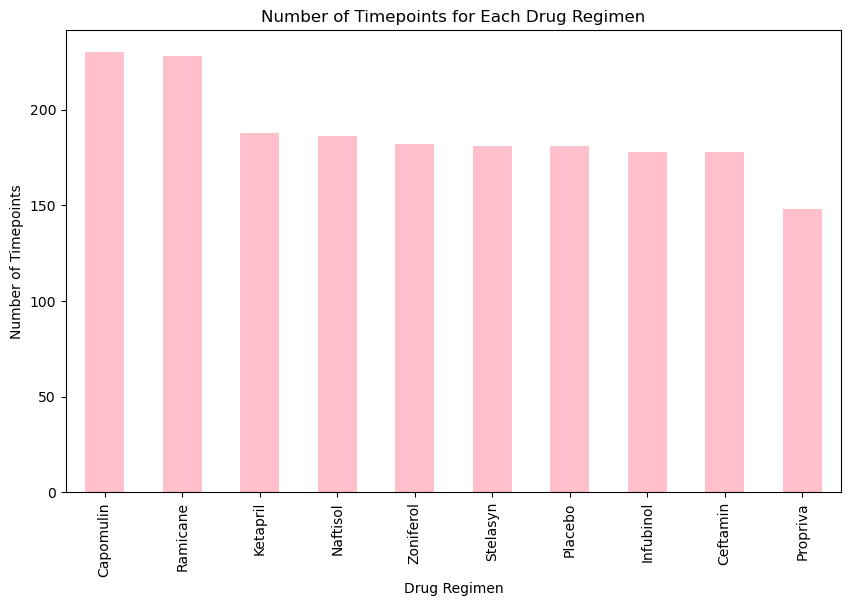

In [54]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

timepoints_per_regimen = clean_data["Drug Regimen"].value_counts()
timepoints_per_regimen.plot(kind='bar', figsize=(10,6), color="pink")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Number of Timepoints for Each Drug Regimen")
plt.tight_layout
plt.show()



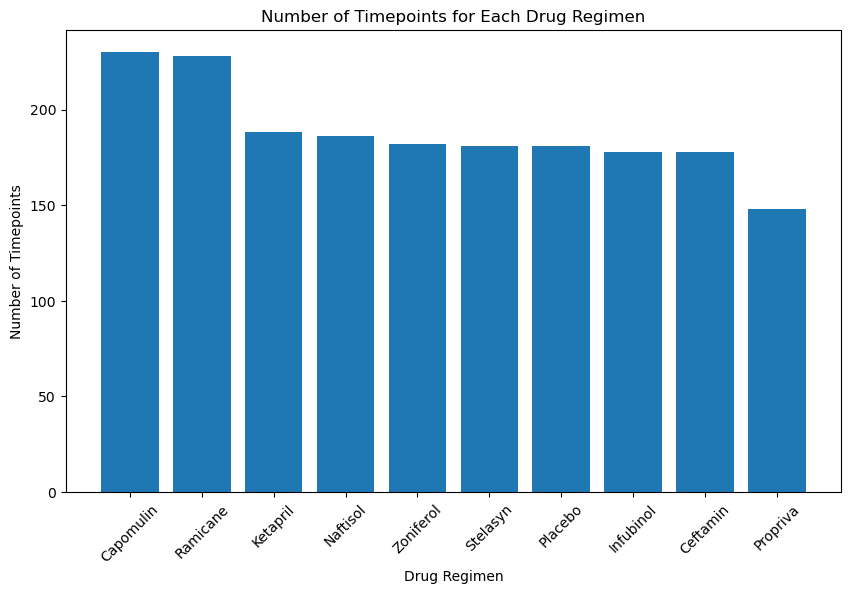

In [55]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

plt.figure(figsize=(10,6))
plt.bar(timepoints_per_regimen.index, timepoints_per_regimen.values)
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Timepoints")
plt.title("Number of Timepoints for Each Drug Regimen")
plt.xticks(rotation=45)
plt.show()



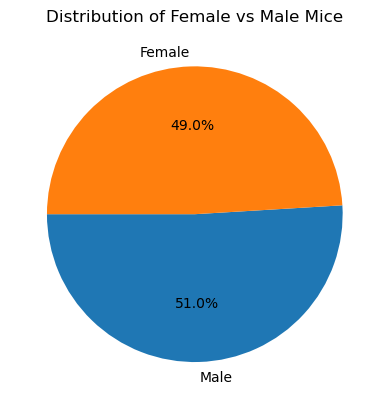

In [56]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

gender = clean_data["Sex"].value_counts()
gender.plot(kind='pie', autopct='%1.1f%%', startangle=180)
plt.title("Distribution of Female vs Male Mice")
plt.ylabel("")
plt.show()


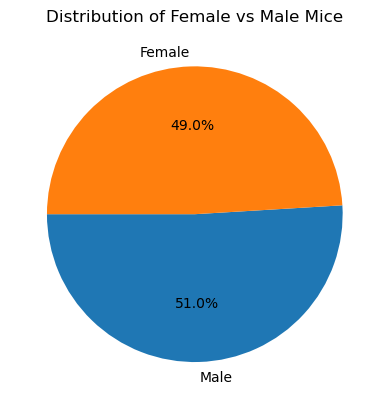

In [57]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

plt.figure()
plt.pie(gender.values, labels=gender.index, autopct='%1.1f%%', startangle=180)
plt.title("Distribution of Female vs Male Mice")
plt.show()


## Quartiles, Outliers and Boxplots

In [58]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Start by getting the last (greatest) timepoint for each mouse

last_timepoints = clean_data.groupby("Mouse ID")["Timepoint"].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint

merged_data = pd.merge(last_timepoints, clean_data, on=["Mouse ID", "Timepoint"], how="left")


In [59]:
# Put treatments into a list for for loop (and later for plot labels)

treatment_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

# Locate the rows which contain mice on each drug and get the tumor volumes

for treatment in treatment_list:
    treatment_data = merged_data[merged_data["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    tumor_vol_data.append(treatment_data)
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"{treatment} potential outliers: {outliers.values}")

# Locate the rows which contain mice on each drug and get the tumor volumes

for treatment in treatment_list:
    treatment_data = merged_data[merged_data["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    print(f"{treatment} tumor volumes: {treatment_data.values}")

    
    # add subset 

for treatment in treatment_list:
    treatment_data = merged_data[merged_data["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    treatment_data_subset = treatment_data[treatment_data.between(lower_bound, upper_bound)]
    print(f"{treatment} tumor volumes subset: {treatment_data_subset.values}")

    
    # Determine outliers using upper and lower bounds

for treatment in treatment_list:
    treatment_data = merged_data[merged_data["Drug Regimen"] == treatment]["Tumor Volume (mm3)"]
    quartiles = treatment_data.quantile([0.25, 0.5, 0.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq - lowerq
    lower_bound = lowerq - (1.5 * iqr)
    upper_bound = upperq + (1.5 * iqr)
    outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    print(f"{treatment} potential outliers: {outliers.values}")



Capomulin potential outliers: []
Ramicane potential outliers: []
Infubinol potential outliers: [36.3213458]
Ceftamin potential outliers: []
Capomulin tumor volumes: [38.98287774 38.93963263 30.48598484 37.07402422 40.1592203  47.68596303
 37.31184577 38.1251644  38.75326548 41.48300765 38.84687569 28.43096411
 33.32909778 46.53920617 32.37735684 41.58152074 23.34359787 40.72857787
 34.45529799 31.02392294 40.65812366 39.95234669 36.04104736 28.48403281
 31.8962384 ]
Ramicane tumor volumes: [38.4076183  43.0475426  38.81036633 32.97852192 38.34200823 33.39765251
 37.31123552 40.65900627 29.12847181 33.56240217 36.37451039 31.56046955
 36.13485243 22.05012627 30.56462509 31.09533505 45.22086888 36.56165229
 37.22565033 43.41938077 30.27623175 40.66771292 43.16637266 44.18345092
 30.63869575]
Infubinol tumor volumes: [67.97341878 65.52574285 57.03186187 66.08306589 72.2267309  36.3213458
 60.96971133 62.43540402 60.91876652 67.28962147 66.19691151 62.11727887
 47.01036401 60.16518046 55.6

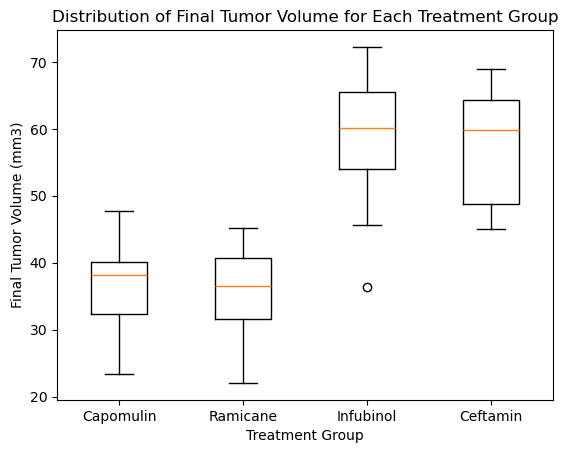

In [60]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

fig, ax = plt.subplots()
ax.boxplot(tumor_vol_data, labels=treatment_list)
ax.set_title('Distribution of Final Tumor Volume for Each Treatment Group')
ax.set_xlabel('Treatment Group')
ax.set_ylabel('Final Tumor Volume (mm3)')
plt.tight_layout
plt.show()



## Line and Scatter Plots

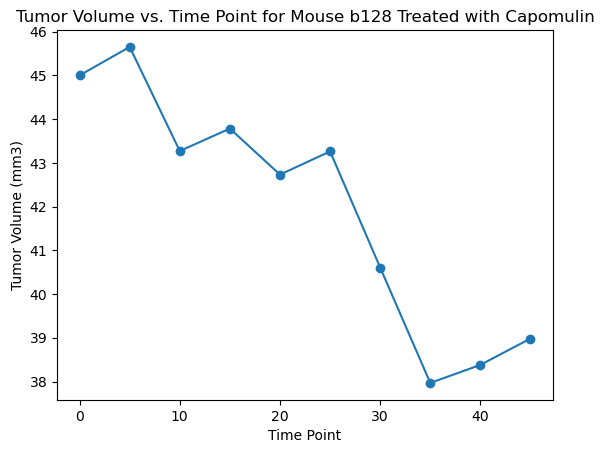

In [61]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

capomulin_mouse = clean_data[clean_data["Drug Regimen"] == "Capomulin"]["Mouse ID"].iloc[0]
capomulin_data = clean_data[(clean_data["Mouse ID"] == capomulin_mouse)]

plt.figure()
plt.plot(capomulin_data["Timepoint"], capomulin_data["Tumor Volume (mm3)"], marker='o')
plt.title(f'Tumor Volume vs. Time Point for Mouse {capomulin_mouse} Treated with Capomulin')
plt.xlabel('Time Point')
plt.ylabel('Tumor Volume (mm3)')
plt.tight_layout
plt.show()


/var/folders/6p/h0sr07r51_qcbxx4mdpg2cc80000gn/T/ipykernel_43166/3418130501.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["Weight (g)"] = pd.to_numeric(clean_data["Weight (g)"], errors='coerce')
/var/folders/6p/h0sr07r51_qcbxx4mdpg2cc80000gn/T/ipykernel_43166/3418130501.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  clean_data["Tumor Volume (mm3)"] = pd.to_numeric(clean_data["Tumor Volume (mm3)"], errors='coerce')


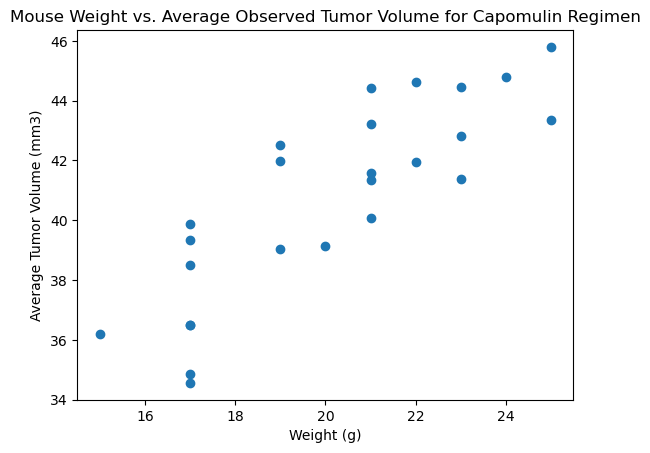

In [62]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


clean_data["Weight (g)"] = pd.to_numeric(clean_data["Weight (g)"], errors='coerce')
clean_data["Tumor Volume (mm3)"] = pd.to_numeric(clean_data["Tumor Volume (mm3)"], errors='coerce')

capomulin_group = clean_data[clean_data["Drug Regimen"] == "Capomulin"][["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
capomulin_avg_tumor_vol = capomulin_group.groupby("Mouse ID").mean()

plt.figure()
plt.scatter(capomulin_avg_tumor_vol["Weight (g)"], capomulin_avg_tumor_vol["Tumor Volume (mm3)"])
plt.title('Mouse Weight vs. Average Observed Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.tight_layout
plt.show()



## Correlation and Regression

Correlation coefficient: 0.8419363424694721


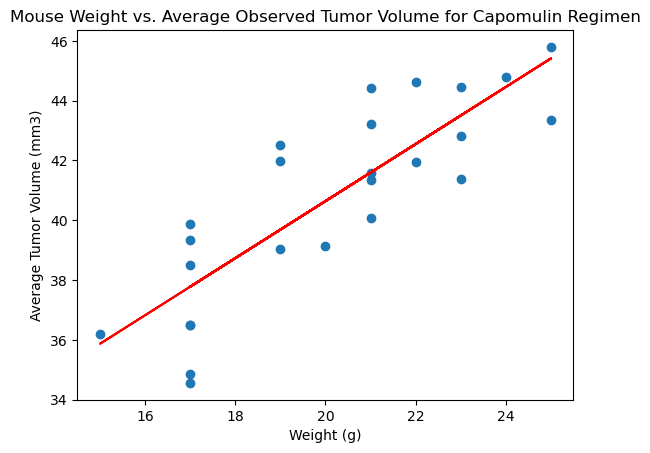

In [63]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen

correlation = st.pearsonr(capomulin_avg_tumor_vol["Weight (g)"], capomulin_avg_tumor_vol["Tumor Volume (mm3)"])[0]
print(f"Correlation coefficient: {correlation}")

(slope, intercept, rvalue, pvalue, stderr) = st.linregress(capomulin_avg_tumor_vol["Weight (g)"], capomulin_avg_tumor_vol["Tumor Volume (mm3)"])
regress_values = capomulin_avg_tumor_vol["Weight (g)"] * slope + intercept

plt.figure()
plt.scatter(capomulin_avg_tumor_vol["Weight (g)"], capomulin_avg_tumor_vol["Tumor Volume (mm3)"])
plt.plot(capomulin_avg_tumor_vol["Weight (g)"], regress_values, "r-")
plt.title('Mouse Weight vs. Average Observed Tumor Volume for Capomulin Regimen')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.tight_layout
plt.show()

